Modified from base code from IBM Coursera: Machine Learning with Python

#### Approach Summary:
Download Data, Exploratory Data Analysis
Check Numerical and Categorical Feature Distributions
Check Numerical Data Correlations with Target
Remove redundant variables
Identify opportunities for dimensionality reduction
Fit Baseline Multiple Regression Model with Numerical Features Only
One Hot Encode Categorical Variables
Fit Multiple Regression Model with all Features
Compare Predictions

#### Results:
Multiple Regression with Numerical Features
Residual sum of squares: 451.81
Variance score: 0.88

Multiple Regression including One Hot Encoded Categorical Features
Residual sum of squares: 23.31
Variance score: 0.99

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

## Download Data and Data Collection

In [3]:
import requests

# store url of dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
# Create requests variable 
r = requests.get(url, allow_redirects=True)
# Write content of request to 'FuelConsumption.csv' file
open('FuelConsumption.csv', 'wb').write(r.content)

72629

In [126]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [127]:
# Set X and y
X = df.drop(columns=['CO2EMISSIONS'])
y = df['CO2EMISSIONS']

In [14]:
print(X.shape,'\n',y.shape)

(1067, 12) 
 (1067,)


In [128]:
# separate numerical and categorical columns
columns_num = X.select_dtypes(exclude='object').columns
columns_cat = X.select_dtypes('object').columns
print("Numerical: ",columns_num,'\nCategorical:',columns_cat)

Numerical:  Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'],
      dtype='object') 
Categorical: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')


## Exploratory Data Analysis

Numerical Features Distribution


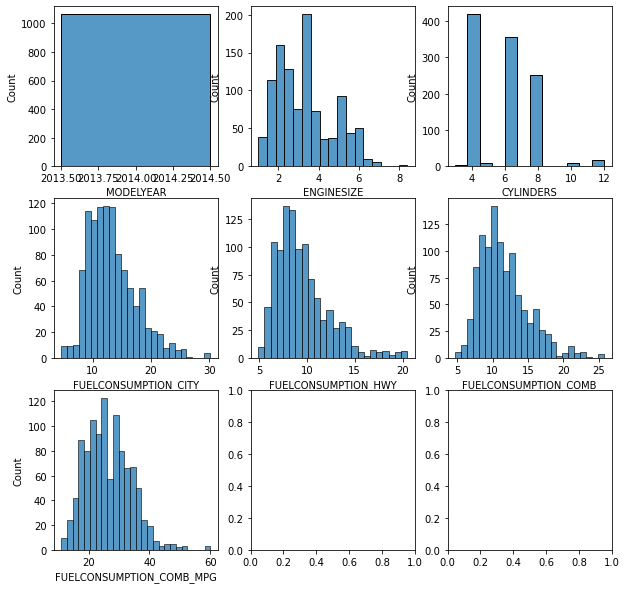

In [68]:
print("Numerical Features Distribution")
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10,10))

for col, ax in zip(columns_num, axs.flat):
    sns.histplot(data=df,
                 x=col,
                 stat='count',
                 common_norm=False,
                 ax=ax)

Numerical Features Correlation with Emissions


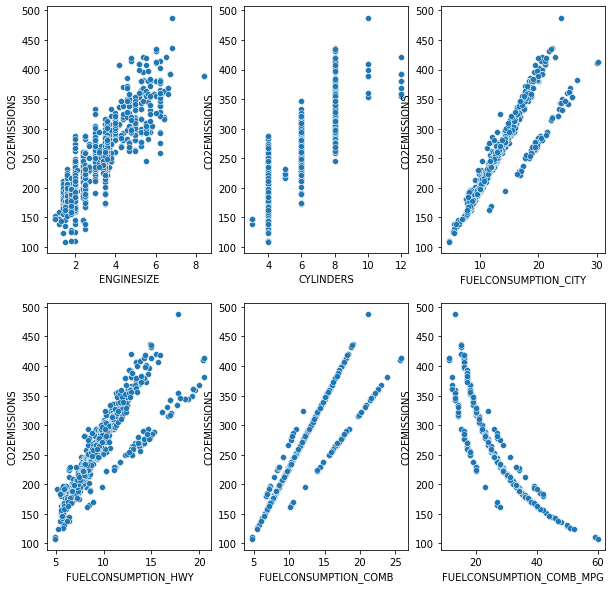

In [80]:
print("Numerical Features Correlation with Emissions")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,10))

for col, ax in zip(columns_num, axs.flat):
    sns.scatterplot(data=df,
                 x=col,
                 y='CO2EMISSIONS',
                 ax=ax)

Categorical Features Distribution


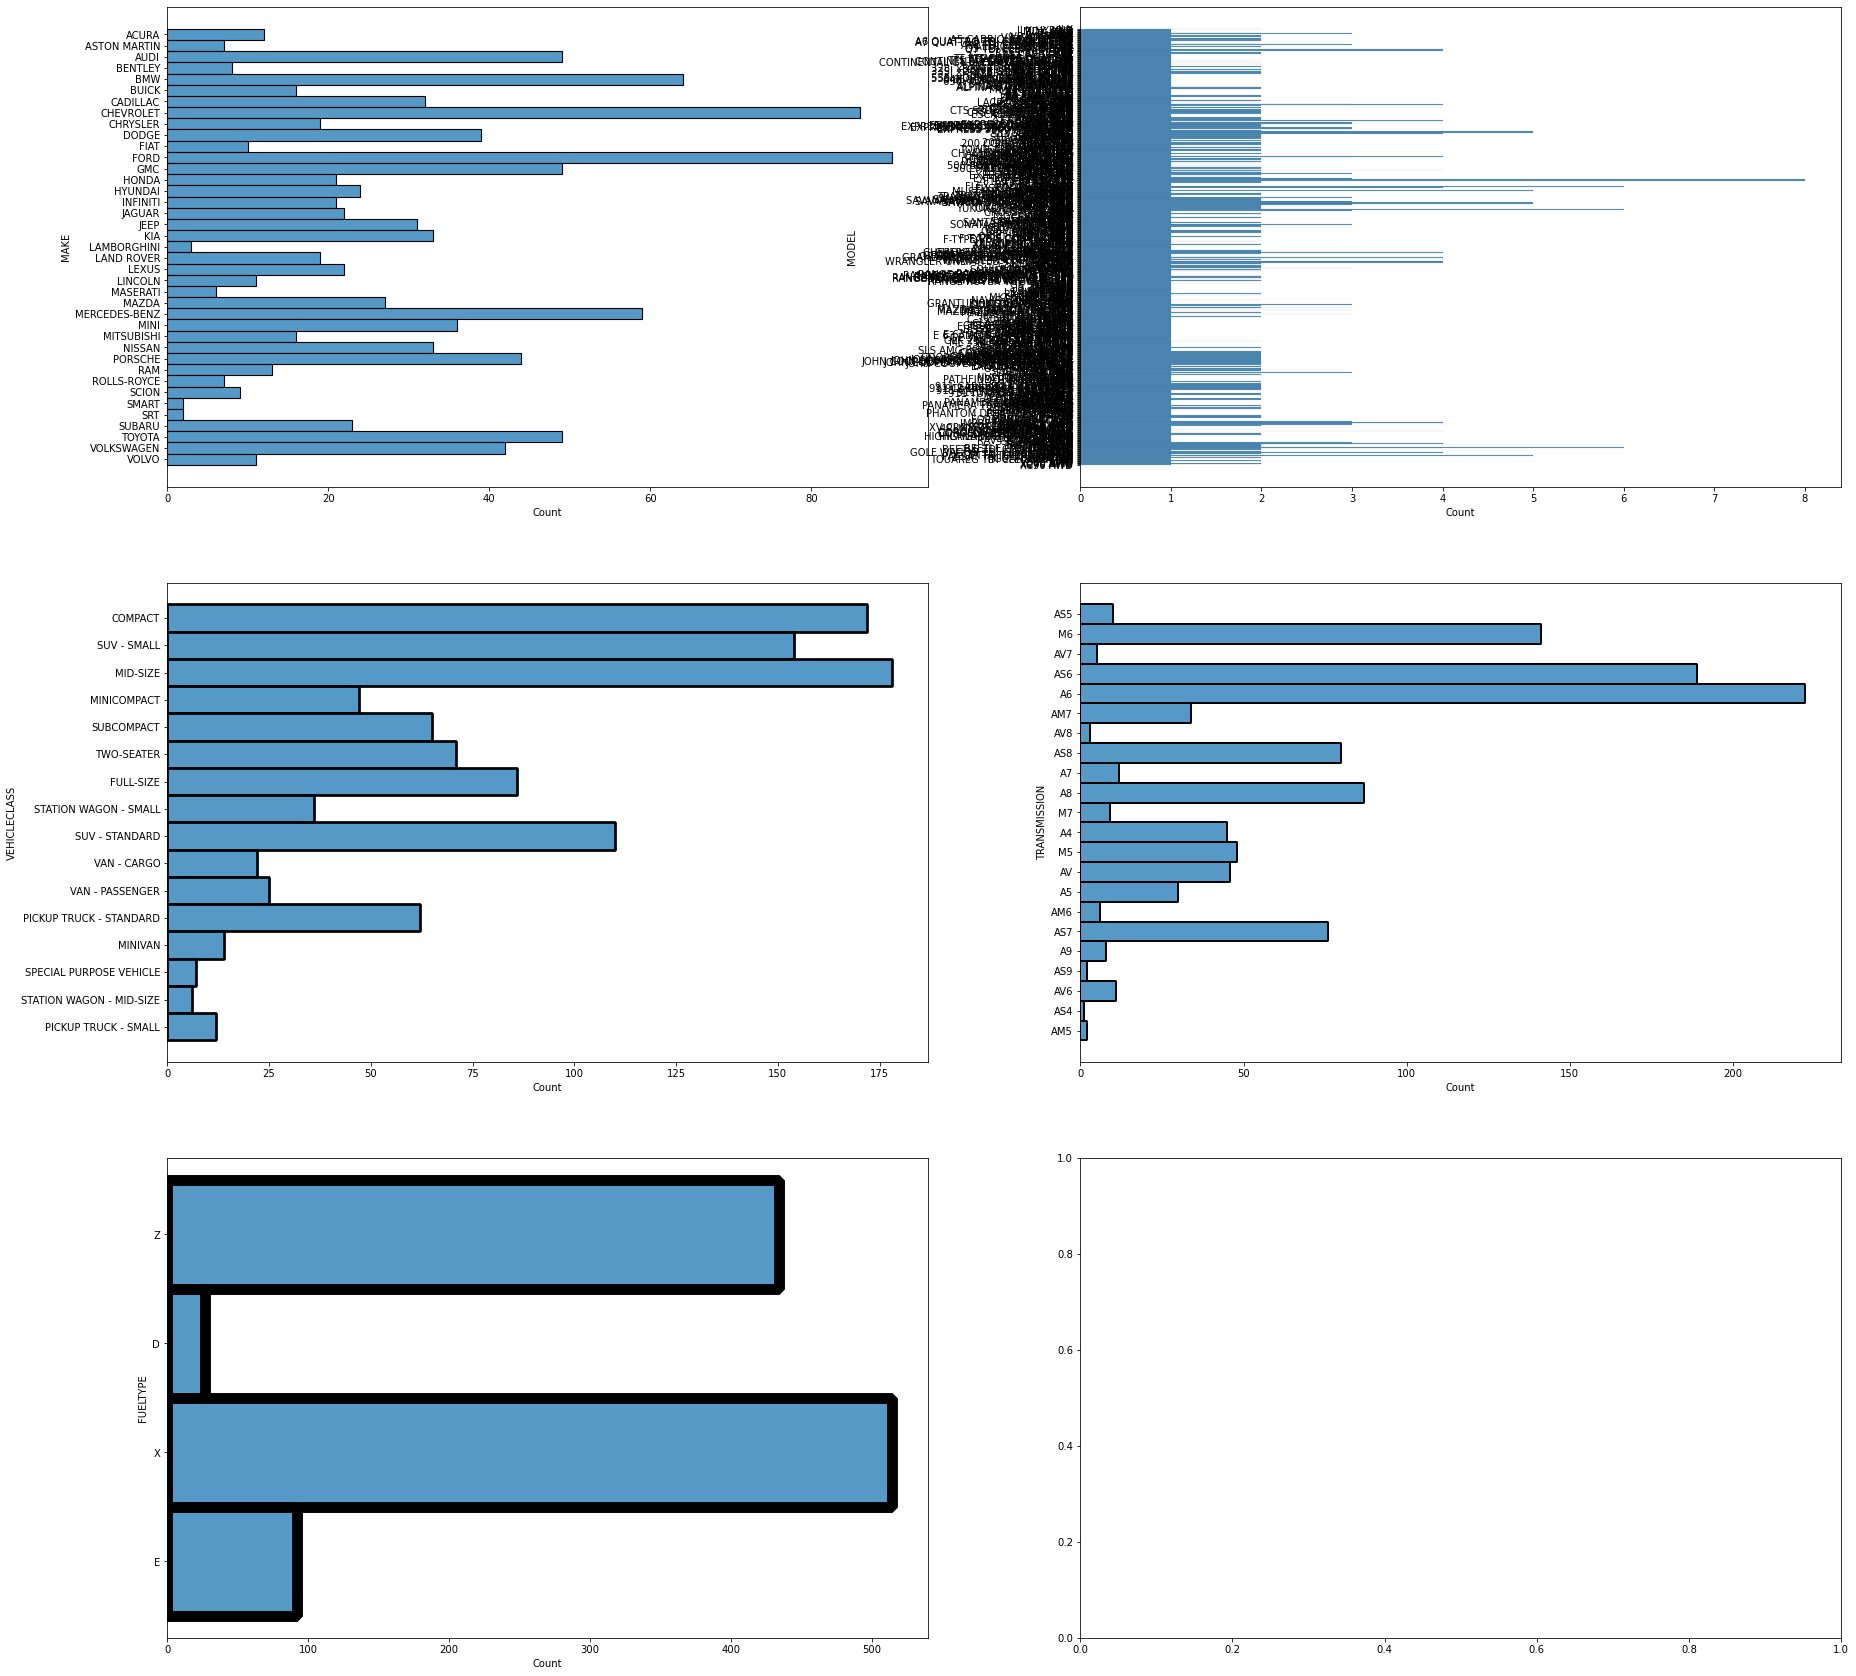

In [69]:
print("Categorical Features Distribution")
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(30, 30))

for col, ax in zip(columns_cat, axs.flat):
    sns.histplot(data=df,
                 y=col,
                 ax=ax)

In [70]:
df.nunique().sort_values(ascending=False)

MODEL                       663
FUELCONSUMPTION_CITY        167
CO2EMISSIONS                159
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_HWY         118
ENGINESIZE                   45
FUELCONSUMPTION_COMB_MPG     43
MAKE                         39
TRANSMISSION                 22
VEHICLECLASS                 16
CYLINDERS                     7
FUELTYPE                      4
MODELYEAR                     1
dtype: int64

In [129]:
# drop 'MODEL' column since # unique values high and broadly distributed
# also drop 'MODELYEAR' since only one unique value
X = X.drop(columns=['MODEL', 'MODELYEAR'])

In [130]:
df.drop(columns=['MODEL', 'MODELYEAR'], inplace=True)

In [131]:
columns_cat = columns_cat.drop('MODEL')
columns_num = columns_num.drop('MODELYEAR')

In [73]:
columns_cat

Index(['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [74]:
# Check feature variables correlation with emissions
X\
    .corrwith(y)\
    .sort_values(ascending=False)\
    .to_frame()\
    .style\
    .bar(vmin=-1, align='zero', vmax=1)


,0
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685
FUELCONSUMPTION_COMB_MPG,-0.906394


High linear correlation evident.
Dimensionality reduction possible by consolidating fuel consumption variables.

#### Preprocessing Summary 

In [76]:
X.nunique()\
    .rename('nunique')\
    .to_frame()\
    .join([X.isna().sum().rename('isna'),
           X.dtypes.rename('type')])\
    .sort_values('nunique')\
    .style.bar()

,nunique,isna,type
FUELTYPE,4,0,object
CYLINDERS,7,0,int64
VEHICLECLASS,16,0,object
TRANSMISSION,22,0,object
MAKE,39,0,object
FUELCONSUMPTION_COMB_MPG,43,0,int64
ENGINESIZE,45,0,float64
FUELCONSUMPTION_HWY,118,0,float64
FUELCONSUMPTION_COMB,148,0,float64
FUELCONSUMPTION_CITY,167,0,float64


#### Create train and test dataset

In [165]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## Multiple Regression Model - Baseline

In [87]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train[columns_num], train['CO2EMISSIONS'])
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [  7.89711794   8.45498802 -16.55106999  -7.93938999  27.88409286
  -3.97809382]
Intercept:  258.41798747163034


## Prediction

In [88]:
y_hat= regr.predict(test[columns_num])
x_test = np.asanyarray(test[columns_num])
y_test = np.asanyarray(test['CO2EMISSIONS'])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 451.81
Variance score: 0.88


## One Hot Encoding Categorical Variables

In [171]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[columns_cat]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[columns_cat]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train.index
OH_cols_test.index = test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train.drop(columns_cat, axis=1)
num_X_test = test.drop(columns_cat, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

## Fit Model and Predict

In [172]:
regr = linear_model.LinearRegression()
OH_X_train_1 = OH_X_train.drop(columns='CO2EMISSIONS')
regr.fit (OH_X_train_1, OH_X_train['CO2EMISSIONS'])
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [ 9.44171101e-01  1.14350199e+00 -5.06645981e+00 -3.16338578e+00
  2.53691526e+01 -1.78081689e+00 -3.56967497e+00  1.25154618e+00
  1.42578412e+00  9.70085877e+00 -4.03925520e+00 -1.72725060e-01
 -1.76026720e-01 -1.63127623e+00  1.10993576e+00  8.99177014e-01
 -7.73612586e-01  1.57076243e+00 -1.47837392e+00 -2.64493386e+00
 -1.12826132e+00 -4.10107885e+00  2.92131239e-01 -1.05759631e+00
 -1.72483315e+00  9.00934245e+00  1.12216866e+00 -1.15957247e+00
  1.21598007e+00  6.51541935e+00 -3.94143739e-01 -2.55059242e+00
 -2.98501369e+00  5.75864172e-02 -2.75930794e+00 -5.65735551e+00
 -3.54461936e-01  5.21589605e+00 -2.41696250e+00  2.32012847e+00
  5.99022417e+00 -2.97973967e+00  7.68517976e-01 -2.99647073e+00
 -1.71419033e+00  2.74769256e-01 -1.23251745e+00 -9.00645948e-01
 -1.33651244e+00 -1.59934239e+00  1.51798939e-01  8.15518052e-01
 -3.55888011e+00 -8.15236558e-01 -1.38339168e+00 -2.54182899e+00
 -1.69282536e+00  7.71402283e-01 -2.58709181e-01  5.78906427e+00
  7.517337

In [179]:
OH_X_test_1 = OH_X_test.drop(columns='CO2EMISSIONS')
y_hat= regr.predict(OH_X_test_1)
x_test = np.asanyarray(OH_X_test_1)
y_test = np.asanyarray(OH_X_test['CO2EMISSIONS'])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 23.31
Variance score: 0.99
